In [27]:
#import lib 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os,glob,shutil
import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [28]:
#import directory which contains the images
input_dir = './Images'

In [29]:
#create fliepath with correct seprator for current os
global_dir = input_dir + '/*.png'
#to locate all files in directory
temp = glob.glob(global_dir)
#print num of images in that folder
print(len(temp))

300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 128, 128, 3)


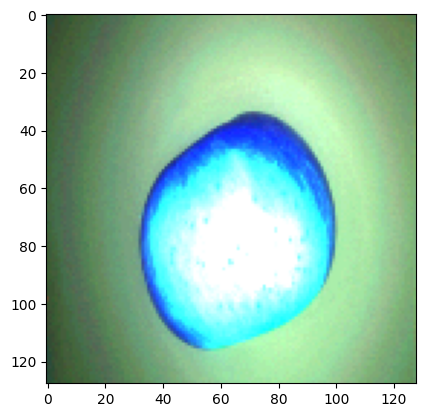

In [37]:
#selection first 100 elements from temp

x = temp
#read and resize images from selected file
images = np.array([cv2.resize(cv2.imread(file),(128,128)) for file in x], dtype=np.float32)

#normalize the images by dividing with 30
images /=30.0
#print the shape of image array
print(images.shape)
plt.imshow(images[40])

In [38]:
#generate embeddings for the image using imagnet to capture the visual characterstics in a lower-dimensional space.

#load mobilenetv2 model pre-trained on internt
model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3), include_top=False, weights=('imagenet'))

#get image embeddings using the model
embeddings = model.predict(images) #images is a numpy array of shape (n_images,128,128,3)

#reshape embeddings to have one dimension per image
embeddings = embeddings.reshape(embeddings.shape[0], -1)
#embeddings is a numpy array of shape (n_images,embedddings_size)
embeddings.shape

10/10 [==============================] - 4s 283ms/step


(300, 20480)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

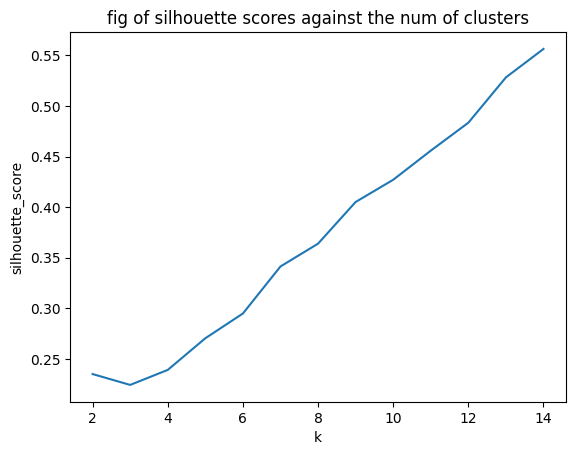

In [39]:
#calculate silhouette scores for different values of k,this is just to calculate the optimal value of k

sil_scores = []
k_values = range(2,15)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=0).fit(embeddings)
    sil_score = silhouette_score(embeddings, kmeans.labels_)
    sil_scores.append(sil_score)
#plot the silhouette scores aainst k
plt.plot(k_values, sil_scores)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('fig of silhouette scores against the num of clusters')

#saving the plot
plt.savefig('fig of silhouette scores against the num of clusters')
plt.show()


In [40]:
#select the num of clusters

n_clusters = 15

#fit kmeans model to the image embeddinsg

kmeans = KMeans(n_clusters=n_clusters,verbose=0,random_state=42)
kmeans.fit(embeddings)

#make predictions using the fitted model
cluster_labels = kmeans.predict(embeddings)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
n_clusters

15

In [42]:
#save the clusters into a different folder

#create output directoruies for each cluster
#images = tem[:100].tolist()

for i in range(n_clusters):
    os.makedirs("cluster"+str(i),exist_ok=True)

#copy images to corresponding cluster directories
for path, cluster_label in zip(temp, cluster_labels):
    shutil.copy2(os.fsdecode(path), "cluster"+str(cluster_label))


TypeError: Invalid shape () for image data

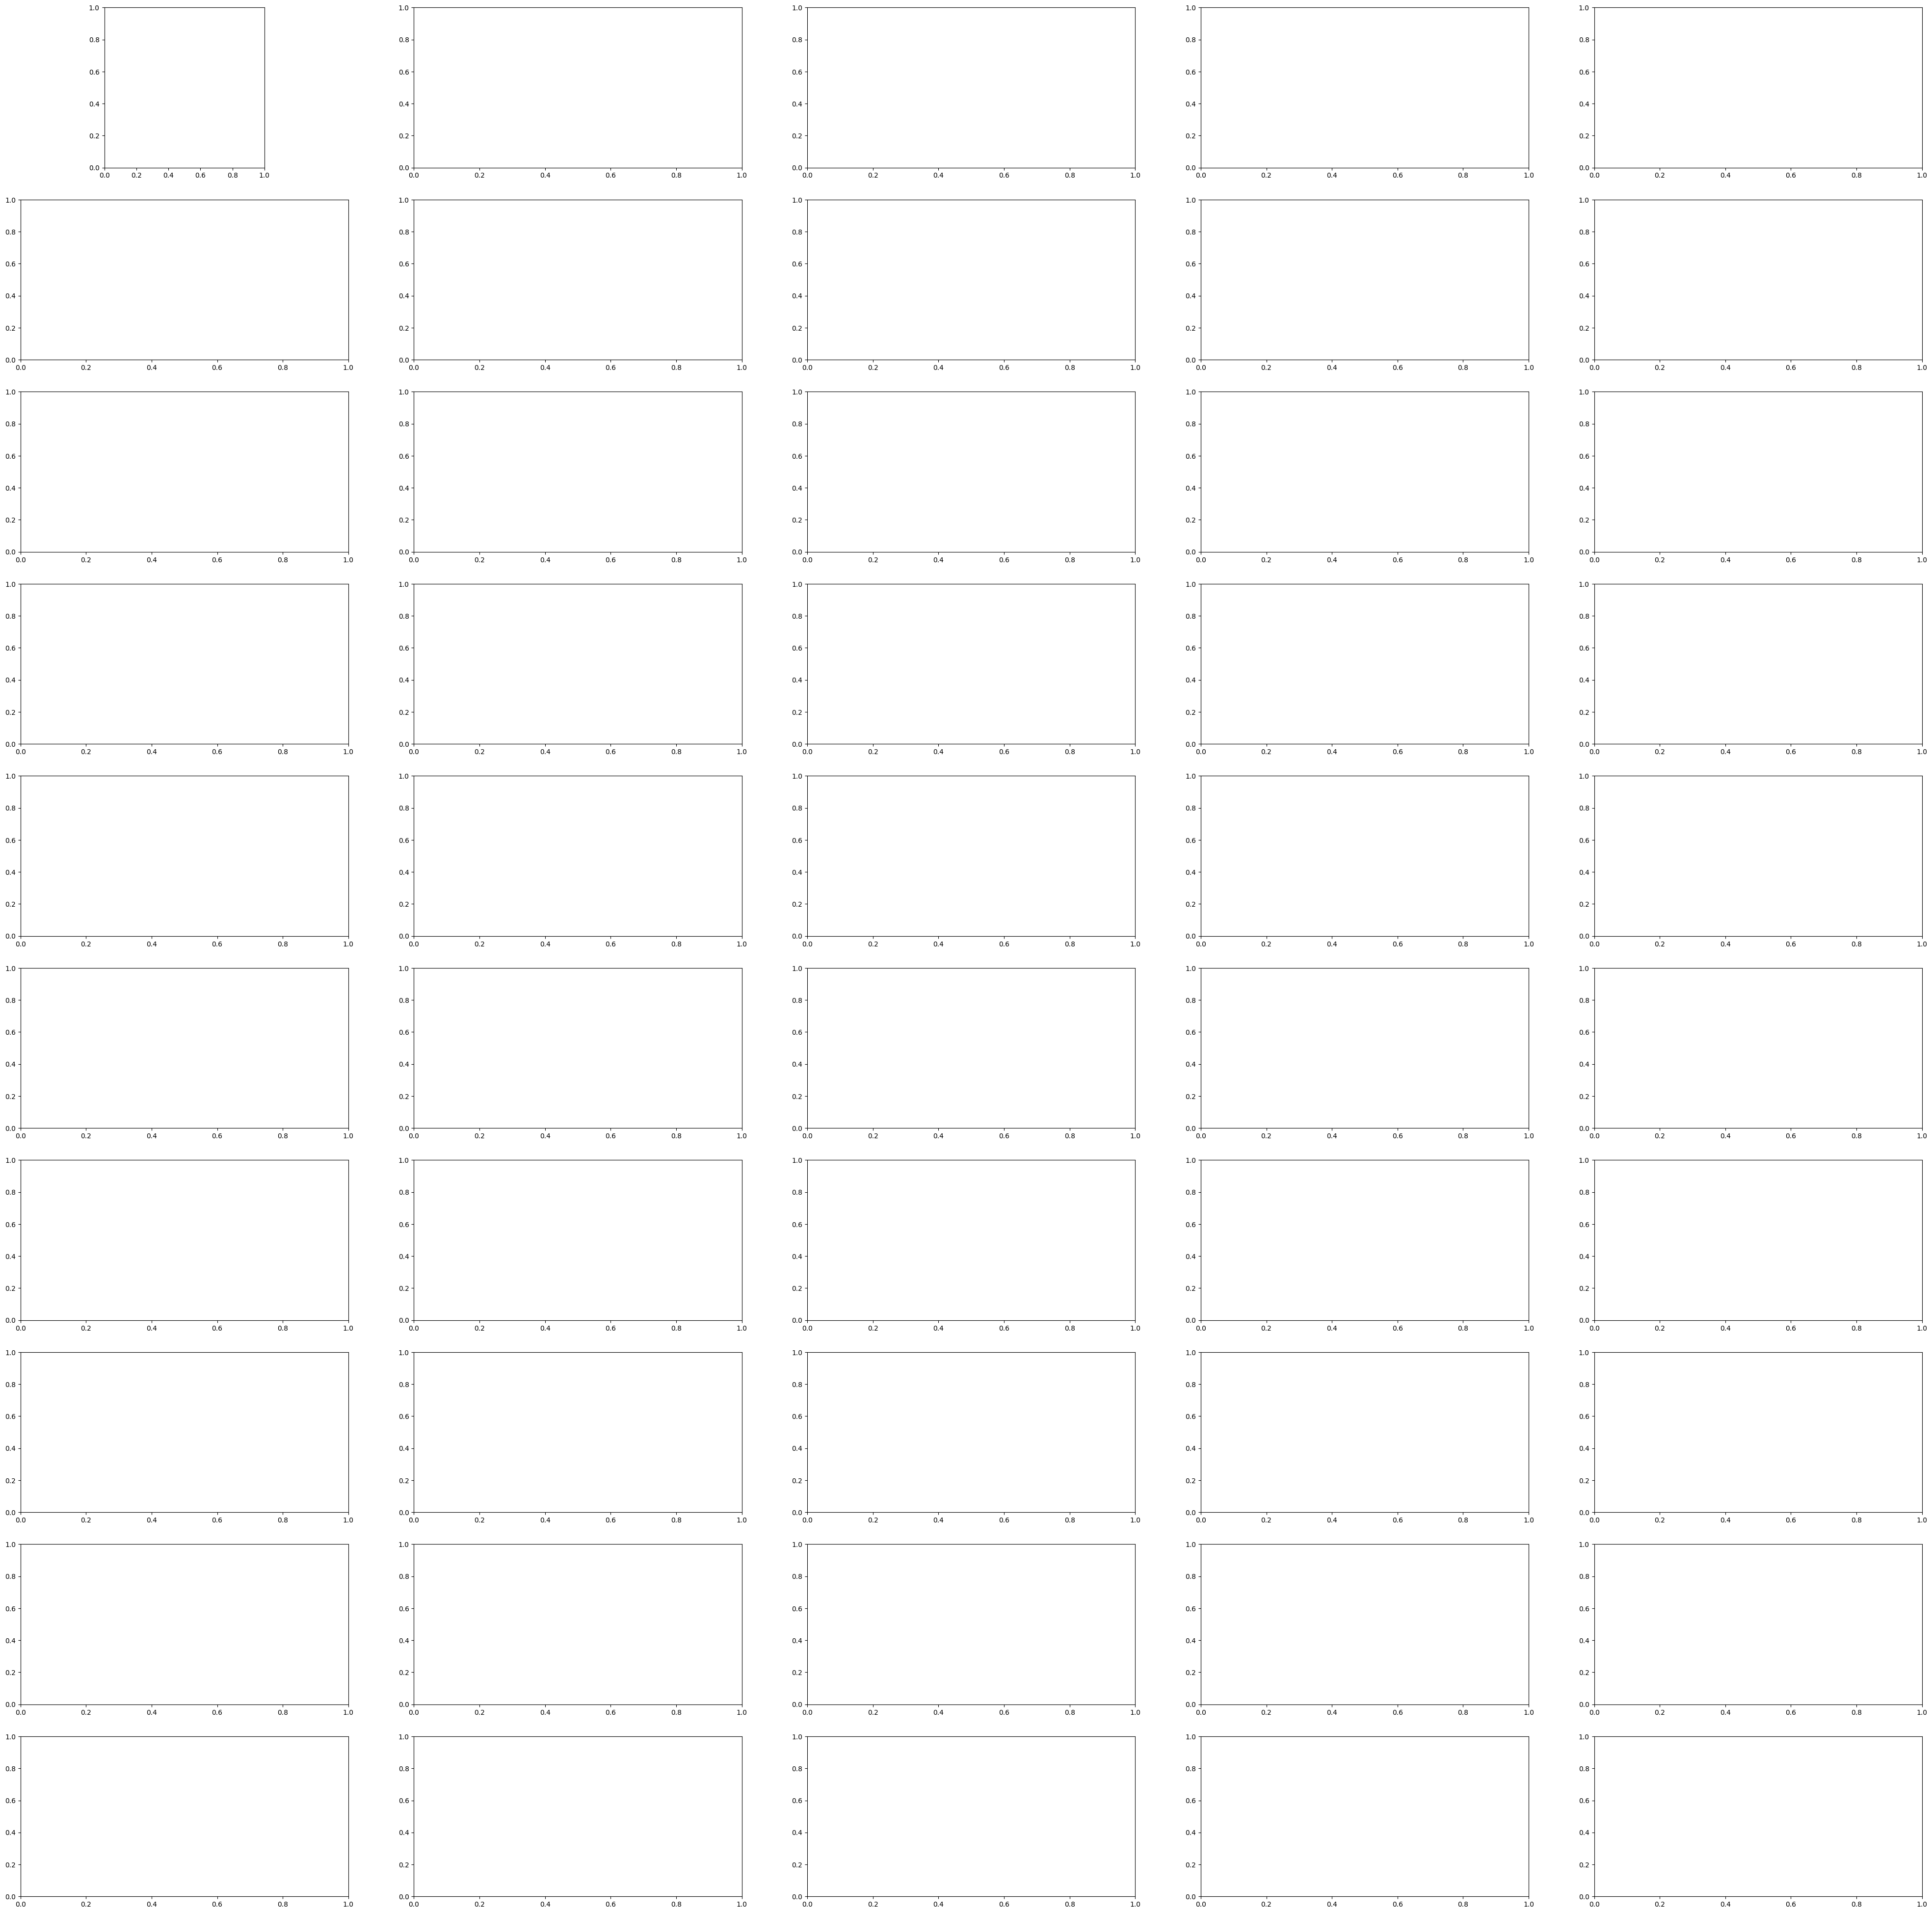

In [43]:
#to plot the cluster results
k=10
fig,axs=plt.subplots(k,5,figsize=(50,50))

for i in range (k):
    cluster_path="cluster"+str(i)+'/*.png'
    images=[cv2.imread(img_path,0) for img_path in glob.glob(cluster_path)]
    #loop over first 10 images
    for j,img in enumerate(images[0:5]):
            axs[i,j].imshow(j, cmap='gray', interpolation='bicubic')
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])